# User Churn Prediction

In this project, we use supervised learning models to identify customers who are likely to stop using service in the future. Furthermore, we will analyze top factors that influence user retention.

## Contents

<ul>
<li>[Part 1: Data Exploration]
<li>[Part 2: Feature Preprocessing]
<li>[Part 3: Model Training and Results Evaluation]
<li>[Part 4: Feature Selection]
</ul>

# Part 1: Data Exploration

### Part 1.1: Analyze the Raw Dataset

In this part, we would like to know the size of raw dataset and get the number of data for each class and the number of feature.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
# import imblearn
# will show all the columns
pd.set_option('display.max_columns', None)
csv_url = '../data/churn.all'
churn_df = pd.read_csv(csv_url)

In [2]:
churn_df.head()
# churn_df.info()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
print ("The number of data is " + str(churn_df.shape[0])) # row count
print ("The number of feature is " + str(churn_df.shape[1])) # col count

The number of data is 5000
The number of feature is 21


In [4]:
tureNum = np.sum(churn_df['churned'] == ' True.')
falseNum = np.sum(churn_df['churned'] == ' False.')
print ("The number of churn data is " + str(tureNum) + ' which account for ' + str(tureNum/5000*100)+'%')
print ("The number of non-churn data is " + str(falseNum) + ' which account for ' + str(falseNum/5000*100) + '%')
print('The data is a little imbalanced.')

The number of churn data is 707 which account for 14.14%
The number of non-churn data is 4293 which account for 85.86%
The data is a little imbalanced.


### Part 1.2: Data cleaning

There are some withespaces in the categorical feature and we need to remove extra whitespaces.

In [5]:
# check categorical feature
churn_df['churned'][0]

' False.'

In [6]:
# remove the heading and trailing whitespaces
churn_df['intl_plan'] = churn_df['intl_plan'].map(lambda x: x.strip())
churn_df['churned'] = churn_df['churned'].map(lambda x: x.strip())
churn_df['voice_mail_plan'] = churn_df['voice_mail_plan'].map(lambda x: x.strip())

In [7]:
# check the categorical feature after manipulation
churn_df['intl_plan'][0]

'no'

Check if there are some null values in dataset. And we can see from the below table. There is no null value in each feature.

In [8]:
print('the number of null values in each feature is shown as below.\n')
print(np.sum(pd.isna(churn_df)))

the number of null values in each feature is shown as below.

state                            0
account_length                   0
area_code                        0
phone_number                     0
intl_plan                        0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churned                          0
dtype: int64


### Part 1.3:  Analyze the features



The distribution of data for each class in every feature.

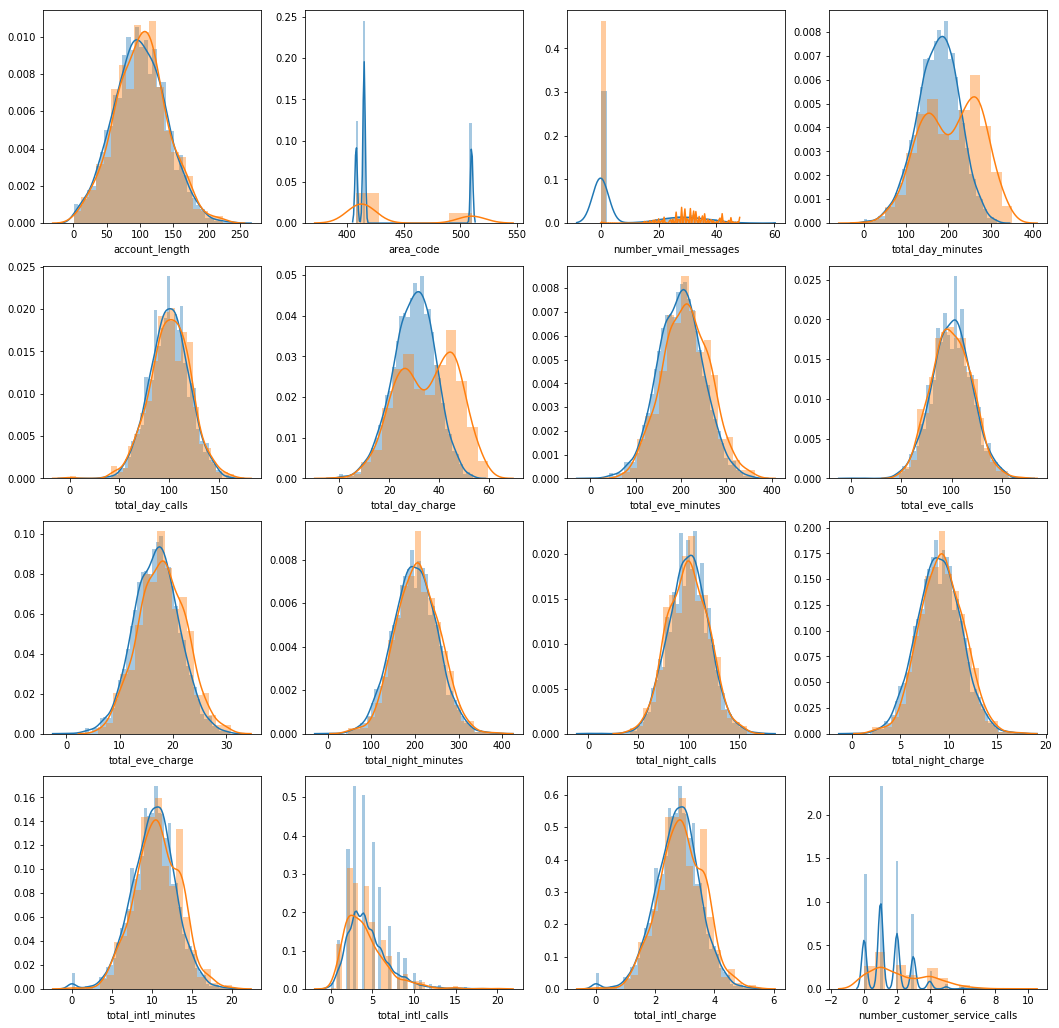

In [9]:
# check the feature distribution
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# sns.distplot(churn_df['total_intl_charge'], kde=False)
numFeatrue = ['churned']
for x in churn_df.columns:
    if x != 'churned' and( churn_df[x].dtype == int or churn_df[x].dtype == float ):
        numFeatrue.append(x)
        
        
        
fig = plt.figure(figsize=(18,18))
axes = [None] * 16
for i in range(1, 17):
    axes[i-1] = fig.add_subplot(4, 4, i)         
    g = sns.FacetGrid(churn_df, hue="churned")
    g.map(sns.distplot, numFeatrue[i], kde=True, ax = axes[i-1] );
    plt.close(g.fig)

plt.show()


The relationship between two features.

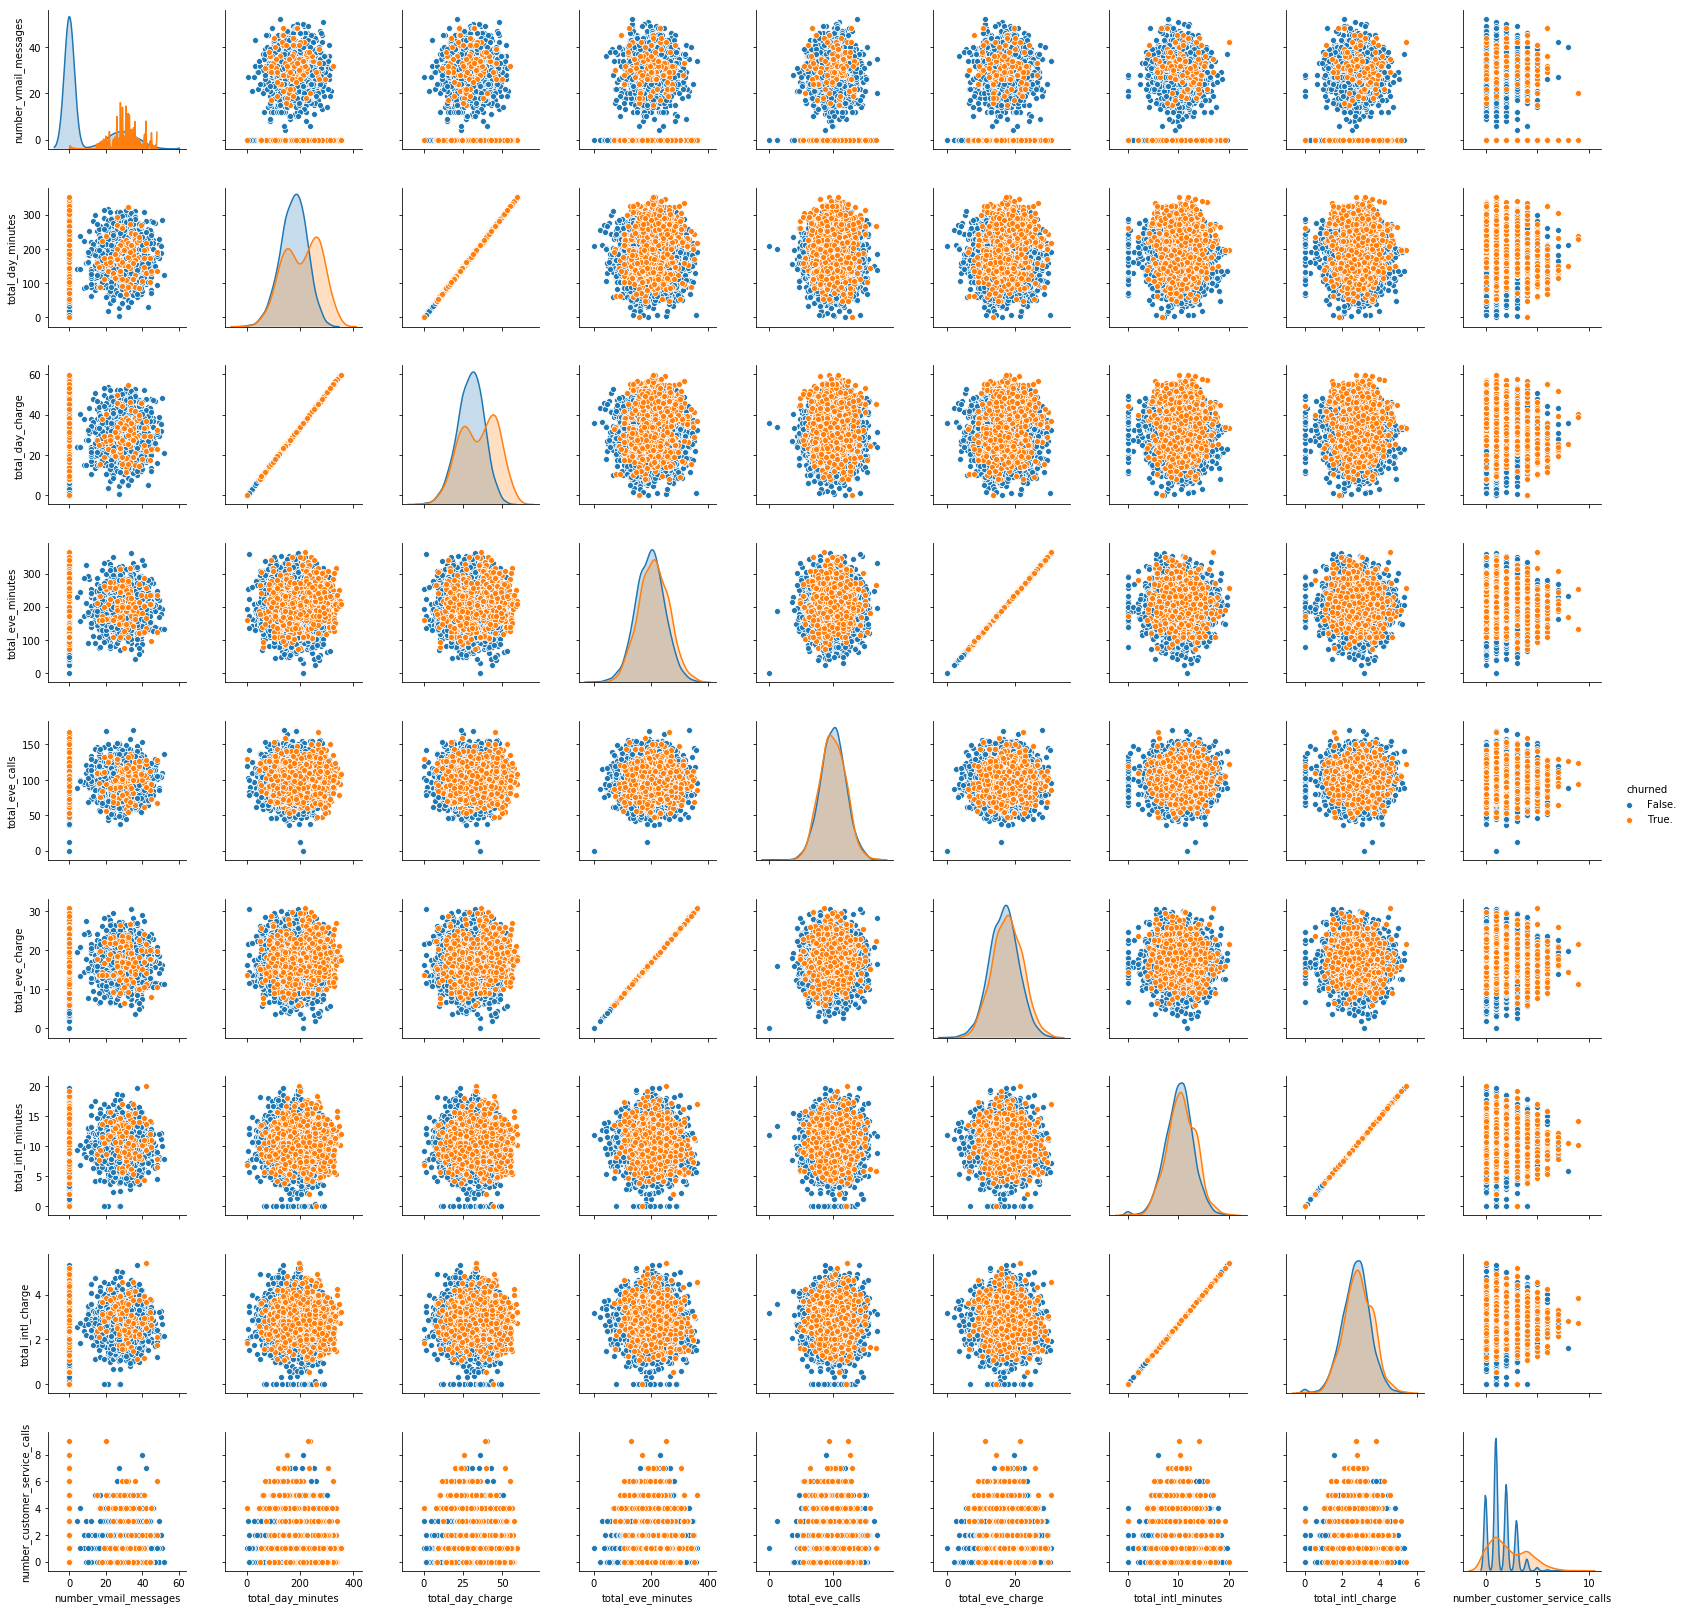

In [10]:
sns.pairplot(churn_df[["number_vmail_messages", "total_day_minutes", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_intl_minutes",
                    "total_intl_charge",'number_customer_service_calls', "churned"]], hue="churned", height=2.5);

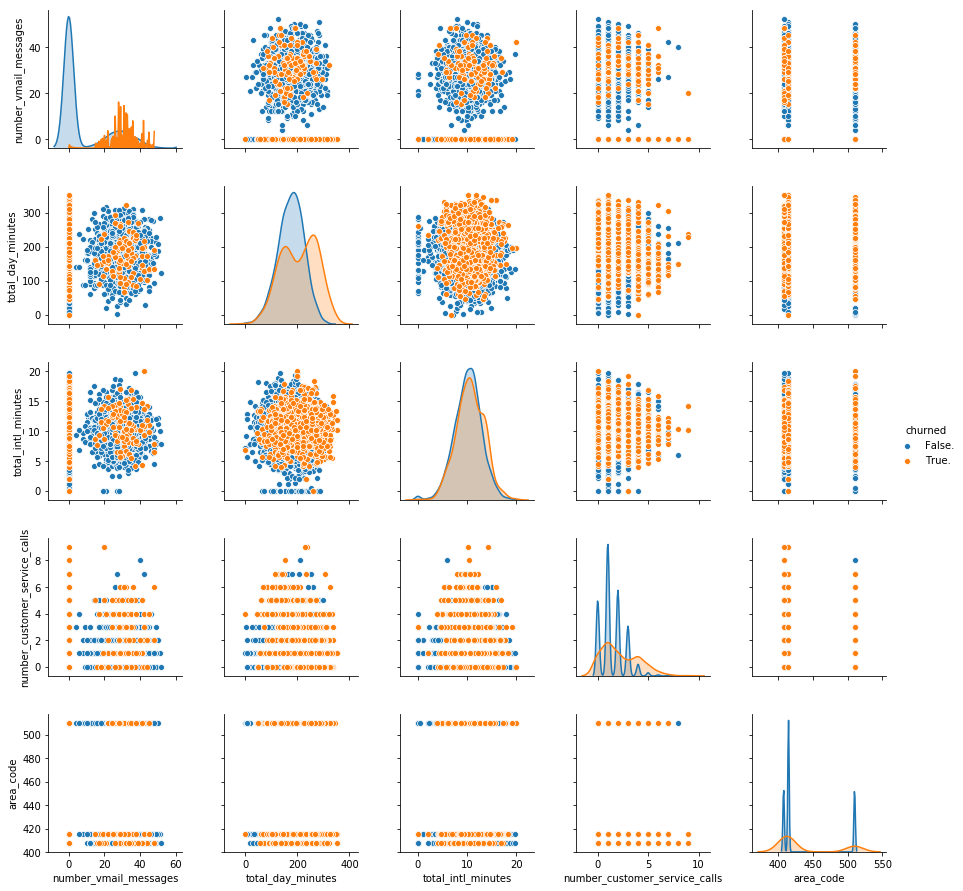

In [11]:
sns.pairplot(churn_df[["number_vmail_messages", "total_day_minutes", "total_intl_minutes",
                       'number_customer_service_calls', "churned",'area_code']], hue="churned", height=2.5);

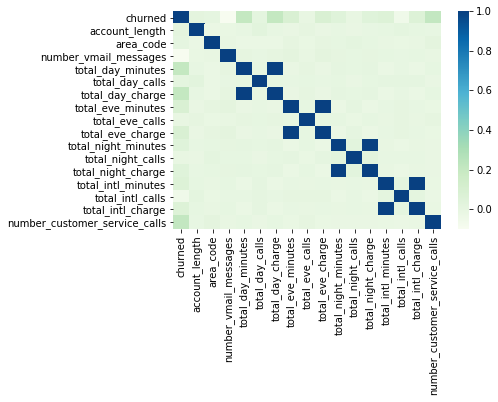

In [12]:
# correlations between all the features
# corr = churn_df[["account_length", "number_vmail_messages", "total_day_minutes",
#                     "total_day_calls", "total_day_charge", "total_eve_minutes",
#                     "total_eve_charge", "total_night_minutes",
#                     "total_night_calls", "total_intl_minutes", "total_intl_calls",
#                     "total_intl_charge"]].corr()
churn_df_corr = churn_df.copy()
churn_df_corr['churned'] = np.where(churn_df['churned'] == 'True.',1,0)
corr = churn_df_corr[numFeatrue].corr()
# show heapmap of correlations
sns.heatmap(corr, cmap = 'GnBu')

In [13]:
# check the actual values of correlations
corr

,churned,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churned,1.000000,0.021203,0.010195,-0.097633,0.207705,0.016130,0.207700,0.089288,-0.006284,0.089282,0.045677,-0.006986,0.045673,0.063285,-0.046893,0.063275,0.212564
account_length,0.021203,1.000000,-0.018054,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.000656,0.001291,0.014277,0.001292,-0.001445
area_code,0.010195,-0.018054,1.000000,-0.003399,-0.019118,-0.019314,-0.019119,0.007098,-0.012300,0.007114,0.002084,0.014657,0.002070,-0.004154,-0.013623,-0.004219,0.020921
number_vmail_messages,-0.097633,-0.014575,-0.003399,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002463,0.000124,0.002505,-0.007086
total_day_minutes,0.207705,-0.001017,-0.019118,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019415,0.002733
total_day_calls,0.016130,0.028240,-0.019314,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.002802,0.013097,0.010893,0.013161,-0.010739
total_day_charge,0.207700,-0.001019,-0.019119,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019419,0.002726
total_eve_minutes,0.089288,-0.009591,0.007098,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000137,0.008388,0.000159,-0.013823
total_eve_calls,-0.006284,0.009143,-0.012300,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,0.001799,-0.007458,0.005574,-0.007507,0.006235
total_eve_charge,0.089282,-0.009587,0.007114,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,-0.016652,0.000132,0.008393,0.000155,-0.013836


In [14]:
# calculate two features correlation
from scipy.stats import pearsonr
print (pearsonr(churn_df['total_day_minutes'], churn_df['number_vmail_messages'])[0])

0.005381375960654535


From above work, we can see some features are strongly correlated. Such as 'total_day_minutes' and 'total_day_charge'. This is reasonable.

# Part 2: Feature Preprocessing

In [15]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Get the label.

In [16]:
y = np.where(churn_df['churned'] == 'True.',1,0)

Drop some useless columns and get the feature dataset.

In [17]:
# Drop some useless columns
to_drop = ['state','area_code','phone_number','churned']
churn_feat_space = churn_df.drop(to_drop, axis=1)

# yes and no have to be converted to boolean values
yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'

X = churn_feat_space

In [18]:
X.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Add catogorical features to dataset using one-hot encoding. For example, state or area_code.

In [19]:
churn_feat_space_category = churn_feat_space.copy()

# state_feature = churn_df['state'].value_counts().index.values
# for state in state_feature:
#     churn_feat_space_category[state] = np.where(churn_df['state'] == state,1,0)
    

churn_feat_space_category['state'] = churn_df['state']
churn_feat_space_category = pd.get_dummies(churn_feat_space_category, columns=['state'])

X = churn_feat_space_category
X.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Scale the data using standardization to reduce the influence of the feature with large value.

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(churn_feat_space_category)

print ("Feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))
print (pd.DataFrame(X).head(2))

Feature space holds 5000 observations and 68 features
Unique target labels: [0 1]
         0        1        2         3         4         5         6   \
0  0.698941 -0.32324  1.66712  1.273145  1.573802  0.502824  1.574074   
1  0.169849 -0.32324  1.66712  1.346973 -0.346802  1.158422 -0.347082   

         7         8         9         10        11        12        13  \
0 -0.064032 -0.060077 -0.063849  0.876999 -0.446928  0.876286 -0.094809   
1 -0.101621  0.141693 -0.101089  1.068992  0.154374  1.069818  1.245227   

         14        15        16        17       18        19       20  \
0 -0.584236 -0.095509 -0.436676 -0.120873 -0.15947 -0.136912 -0.13462   
1 -0.584236  1.245982 -0.436676 -0.120873 -0.15947 -0.136912 -0.13462   

         21        22        23        24       25        26        27  \
0 -0.102515 -0.139914 -0.142127 -0.133848 -0.13842 -0.135388 -0.129924   
1 -0.102515 -0.139914 -0.142127 -0.133848 -0.13842 -0.135388 -0.129924   

         28        29        

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Part 3: Model Training and Result Evaluation

### Part 3.1: Split dataset

In [21]:
# Splite data into training and testing
from sklearn import model_selection

# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 4000 observation with 68 features
test data has 1000 observation with 68 features


In [22]:
X_train

array([[-0.18287962, -0.32324017, -0.5998368 , ..., -0.14717056,
        -0.18064093, -0.15343224],
       [-0.61119273, -0.32324017, -0.5998368 , ..., -0.14717056,
        -0.18064093, -0.15343224],
       [-0.86314162, -0.32324017,  1.66712012, ..., -0.14717056,
        -0.18064093, -0.15343224],
       ...,
       [-0.13248984, -0.32324017, -0.5998368 , ..., -0.14717056,
        -0.18064093, -0.15343224],
       [ 1.53037282, -0.32324017, -0.5998368 , ..., -0.14717056,
        -0.18064093, -0.15343224],
       [ 0.11945905,  3.09367492,  1.66712012, ..., -0.14717056,
        -0.18064093, -0.15343224]])

### Part 3.2: Model Training and Selection

In [23]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

# SVM
classifier_SVC = SVC()

In [24]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [26]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.862

In [27]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest', 'SVM']
model_list = [classifier_logistic, classifier_KNN, classifier_RF, classifier_SVC]
count = 0


for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    # cprint(cv_score)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.867
Model accuracy of KNN is: 0.866
Model accuracy of Random Forest is: 0.934
Model accuracy of SVM is: 0.874


### Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [28]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [29]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [30]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.868
Best parameters set:
	C: 1
	penalty: 'l1'


In [31]:
# best model
best_LR_model = Grid_LR.best_estimator_

#### Part 3.3.2: Find Optimal Hyperparameters: KNN

In [32]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,10] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.866
Best parameters set:
	n_neighbors: 5


In [34]:
# best model
best_KNN_model = Grid_KNN.best_estimator_

#### Part 3.3.3: Find Optimal Hyperparameters: Random Forest

In [35]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [40, 60, 80]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [36]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.952
Best parameters set:
	n_estimators: 60


In [37]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

#### Part 3.3.4: Find Optimal Hyperparameters: SVM

In [38]:
# Possible hyperparamter options for Support Vector Machine
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) Penalty
parameters = {
    'kernel':('rbf', 'linear'), 
    'C':(1, 5, 10)
}
Grid_SVC = GridSearchCV(SVC(probability =True),parameters, cv=5)
Grid_SVC.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('rbf', 'linear'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_SVC)

Best score: 0.895
Best parameters set:
	C: 5
	kernel: 'rbf'


In [40]:
# best model
best_SVC_model = Grid_SVC.best_estimator_

### Part 3.4: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);  
Total number of true predictive churn divided by the total number of predictive churn;  
High Precision means low fp, not many return users were predicted as churn users. 


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)  
Predict most postive or churn user correctly.  
High recall means low fn, not many churn users were predicted as return users.

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    F1 = 2 /(1/precision + 1/recall)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)
    print ("F1 value is: %0.3f" % F1)

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.929
precision is: 0.896
recall is: 0.613
F1 value is: 0.728


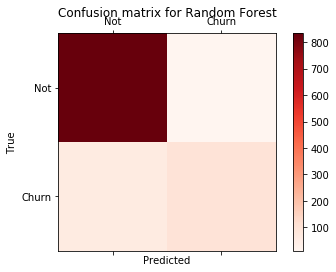

Logistic Regression
Accuracy is: 0.864
precision is: 0.656
recall is: 0.258
F1 value is: 0.370


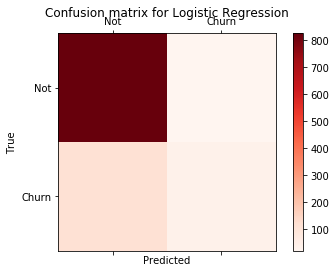

KNN
Accuracy is: 0.856
precision is: 0.739
recall is: 0.110
F1 value is: 0.191


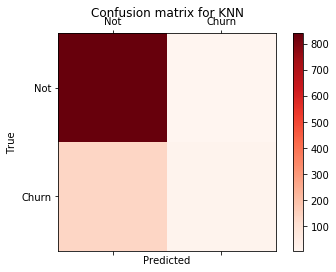

SVM
Accuracy is: 0.885
precision is: 0.679
recall is: 0.490
F1 value is: 0.569


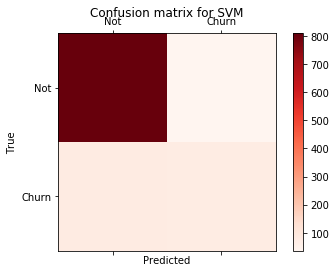

In [42]:
%matplotlib inline

# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [ 
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("KNN", confusion_matrix(y_test,best_KNN_model.predict(X_test))),
    ("SVM", confusion_matrix(y_test,best_SVC_model.predict(X_test))),
]

draw_confusion_matrices(confusion_matrices)

### Part 3.4: Model Evaluation - ROC & AUC

RandomForestClassifier, KNeighborsClassifier, LogisticRegression and SVM have predict_prob() function.
We will evalute the RF and logistic regression model.

#### Part 3.4.1: ROC of RF Model

In [43]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

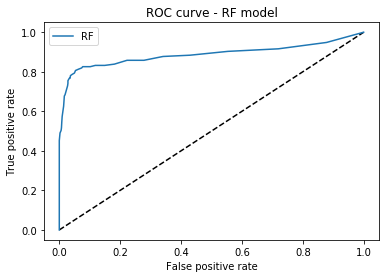

In [44]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [45]:
from sklearn import metrics

# AUC score
print('The AUC score is ' + str(metrics.auc(fpr_rf,tpr_rf)))

The AUC score is 0.8865508684863523


#### Part 3.4.1: ROC of LR Model

In [46]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)

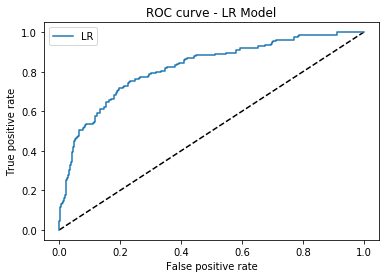

In [47]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [48]:
# AUC score
print('The AUC score is ' + str(metrics.auc(fpr_lr,tpr_lr)))

The AUC score is 0.8217369727047147


# Part 4: Feature Selection

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 

The corelated features that we are interested in: (total_day_minutes, total_day_charge), (total_eve_minutes, total_eve_charge), (total_intl_minutes, total_intl_charge).

In [49]:
# add L1 regularization to logistic regression
# check the coef for feature selection
LRmodel_l1 = LogisticRegression(penalty="l1")
LRmodel_l1.fit(X, y)
LRmodel_l1.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      churn_feat_space.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
voice_mail_plan: -0.8707
number_customer_service_calls: 0.6877
intl_plan: 0.6469
total_day_minutes: 0.4233
number_vmail_messages: 0.4002
total_day_charge: 0.3226
total_eve_charge: 0.3003
total_intl_minutes: 0.2233
total_intl_calls: -0.1668
total_night_charge: 0.1311
total_night_minutes: 0.0789
total_eve_minutes: 0.0714
account_length: 0.0609
total_day_calls: 0.0583
total_night_calls: -0.0417
total_eve_calls: -0.0248
total_intl_charge: 0.0224


In [50]:
# add L2 regularization to logistic regression
# check the coef for feature selection
LRmodel_l2 = LogisticRegression(penalty="l2")
LRmodel_l2.fit(X, y)
LRmodel_l2.coef_[0]
print ("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      churn_feat_space.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))
  

Logistic Regression (L2) Coefficients
voice_mail_plan: -0.8981
number_customer_service_calls: 0.6885
intl_plan: 0.6479
number_vmail_messages: 0.4276
total_day_minutes: 0.3777
total_day_charge: 0.3694
total_eve_charge: 0.1871
total_eve_minutes: 0.1869
total_intl_calls: -0.1687
total_intl_charge: 0.1281
total_intl_minutes: 0.1193
total_night_minutes: 0.11
total_night_charge: 0.1021
account_length: 0.063
total_day_calls: 0.0608
total_night_calls: -0.0438
total_eve_calls: -0.027


We can see from above resuts the coefficients of corelated features in model with l2 penalty will be similar. But in l1 penalty model, the coefficients of corelated features will be very different.

### Part 4.2:  Random Forest Model - Feature Importance Discussion

In [51]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), churn_feat_space.columns), reverse=True):
    print (v + ": " + str(k))

Feature importance ranking by Random Forest Model:
total_day_minutes: 0.1426
total_day_charge: 0.1172
number_customer_service_calls: 0.1034
intl_plan: 0.0756
total_eve_charge: 0.0653
total_eve_minutes: 0.0565
total_intl_calls: 0.0445
total_night_minutes: 0.0424
total_intl_charge: 0.0418
total_night_charge: 0.0392
total_intl_minutes: 0.0383
total_day_calls: 0.0306
account_length: 0.0303
total_night_calls: 0.0284
total_eve_calls: 0.0274
number_vmail_messages: 0.0183
voice_mail_plan: 0.018
